In [1]:
%matplotlib inline

## Realizar dendrograma clustering jerárquico

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [3]:
# Crear el data set
iris = load_iris()
X = iris.data

In [4]:
# Variables independientes del data set que corresponden a caraterísticas físicas de una flor
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# Convertirlo a Data Frame

X = pd.DataFrame(X, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Escalar datos
scaler = StandardScaler().fit(X)
X=scaler.transform(X)
X[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

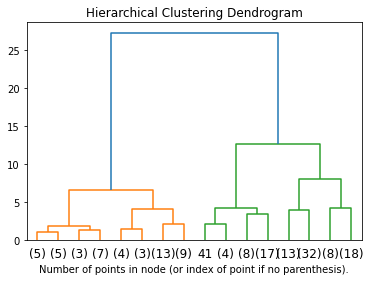

In [8]:
# Crear el modelo y dibujar el Dendrogram

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Algoritmo jerárquico 3 segmentos

In [9]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)

AgglomerativeClustering(n_clusters=3)

In [10]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Filtrar cada uno de los clusters

In [11]:
group_0 = scaler.inverse_transform(X)[model.labels_==0]
group_0[:5,:]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [6.3, 3.3, 4.7, 1.6]])

In [12]:
pd.DataFrame(group_0, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,6.5,2.8,4.6,1.5
4,6.3,3.3,4.7,1.6
...,...,...,...,...
66,6.7,3.0,5.2,2.3
67,6.3,2.5,5.0,1.9
68,6.5,3.0,5.2,2.0
69,6.2,3.4,5.4,2.3


In [13]:
group_1 = scaler.inverse_transform(X)[model.labels_==1]
group_1[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
pd.DataFrame(group_1, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [15]:
group_2 = scaler.inverse_transform(X)[model.labels_==2]
group_2[:5,:]

array([[4.5, 2.3, 1.3, 0.3],
       [5.5, 2.3, 4. , 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [5.2, 2.7, 3.9, 1.4]])

In [16]:
pd.DataFrame(group_2, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.5,2.3,1.3,0.3
1,5.5,2.3,4.0,1.3
2,5.7,2.8,4.5,1.3
3,4.9,2.4,3.3,1.0
4,5.2,2.7,3.9,1.4
5,5.0,2.0,3.5,1.0
6,6.0,2.2,4.0,1.0
7,5.6,2.9,3.6,1.3
8,5.6,3.0,4.5,1.5
9,5.8,2.7,4.1,1.0


## Algoritmo basado en densidad (DB Scan)

In [17]:
# Crear el modelo 
db = DBSCAN(eps=0.8, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [18]:
# Mostrar resultados
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 4
Silhouette Coefficient: 0.522


Text(0.5, 1.0, 'Estimated number of clusters: 2')

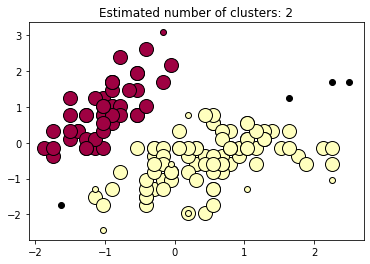

In [19]:
# Graficar resultados
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()